<a href="https://colab.research.google.com/github/DimaSidorenko/Deep_learning/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()


Saving test.csv.zip to test.csv.zip
Saving sample_submission.csv to sample_submission.csv
Saving train.csv.zip to train.csv.zip


In [2]:
!unzip test.csv.zip
!unzip train.csv.zip


Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
import numpy as np 
import matplotlib.pyplot as plt


In [26]:
train_dataset = np.loadtxt('train.csv', skiprows = 1, delimiter = ',')

train_dataset

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [0]:
y_train = train_dataset[:, 0]
x_train = train_dataset[:, 1:]

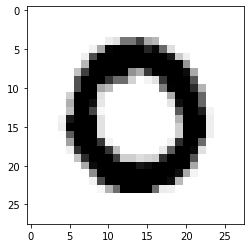

In [28]:
sample = x_train[1].reshape(28, 28)
plt.imshow(sample, cmap = 'binary')
plt.show()

In [29]:
x_train /= 255
np.max(x_train)

1.0

In [0]:
from keras import utils 
y_train = utils.to_categorical(y_train)

In [31]:
y_train 

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [0]:
model = Sequential()
model.add(Dense(2500, input_dim = 784, activation = 'relu'))
model.add(Dense(2000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2500)              1962500   
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              5002000   
_________________________________________________________________
dense_7 (Dense)              (None, 1500)              3001500   
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5010      
Total params: 11,972,510
Trainable params: 11,972,510
Non-trainable params: 0
__________________________________________

In [82]:
model.fit(x_train, y_train, batch_size = 100, epochs = 30, verbose = 1, validation_split = 0.2)

Epoch 1/30
336/336 [==============================] - 2s 5ms/step - loss: 8.7042e-04 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9765
Epoch 2/30
336/336 [==============================] - 2s 5ms/step - loss: 8.5408e-04 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9767
Epoch 3/30
336/336 [==============================] - 1s 4ms/step - loss: 8.3812e-04 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9763
Epoch 4/30
336/336 [==============================] - 2s 5ms/step - loss: 8.2229e-04 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9763
Epoch 5/30
336/336 [==============================] - 1s 4ms/step - loss: 8.0788e-04 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9763
Epoch 6/30
336/336 [==============================] - 2s 4ms/step - loss: 7.9384e-04 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9768
Epoch 7/30
336/336 [==============================] - 2s 4ms/step - loss: 7.7767e-04 - accuracy: 1.0000 - val_loss: 0.0995 -

In [83]:
test_dataset = np.loadtxt('test.csv', skiprows = 1, delimiter = ',')

test_dataset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_test = test_dataset / 255

In [85]:
y_predict = model.predict(x_test, verbose = 1)

875/875 [==============================] - 1s 1ms/step


In [0]:
out = y_predict.argmax(axis = 1)

In [0]:
out = np.column_stack((range(1, out.shape[0]+1), out))


In [88]:
out

array([[    1,     2],
       [    2,     0],
       [    3,     9],
       ...,
       [27998,     3],
       [27999,     9],
       [28000,     2]])

In [0]:
np.savetxt('MNIST.csv',out,header='ImageId,Label',comments="",fmt="%d,%d")


In [90]:
!head MNIST.csv

ImageId,Label
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0


In [0]:
from google.colab import files

files.download('MNIST.csv')